# LAB 5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Lab 4/CO2Small.csv')

In [3]:
df.head()

,EngineSize,Cylinders,FuelConsum,CO2Emissions
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


Text(0, 0.5, 'CO2 Emissions')

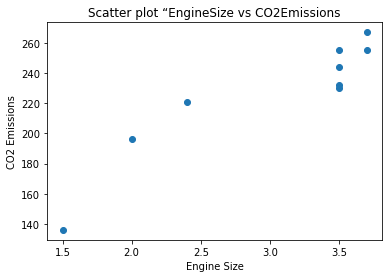

In [4]:
# 1. Scatter plot “EngineSize vs CO2Emissions”
plt.scatter(x = df['EngineSize'], y = df['CO2Emissions'])
plt.title("Scatter plot “EngineSize vs CO2Emissions")
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(df)

array([[-1.31233465, -1.41421356, -0.81110711, -0.80253099],
       [-0.80433414, -1.41421356, -0.14194374, -0.13867263],
       [-1.94733528, -1.41421356, -2.39276596, -2.39579105],
       [ 0.59266726,  0.70710678,  0.77055175,  0.76417473],
       [ 0.59266726,  0.70710678,  0.46638659,  0.47207705],
       [ 0.59266726,  0.70710678,  0.10138839,  0.10031637],
       [ 0.59266726,  0.70710678,  0.16222142,  0.15342504],
       [ 0.84666751,  0.70710678,  0.77055175,  0.76417473],
       [ 0.84666751,  0.70710678,  1.07471691,  1.08282674]])

In [6]:
X = df.iloc[:,0:1].values
Y = df.iloc[:,-1].values

In [7]:
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor(max_iter = 1000, tol = 1e-3)
regressor.fit(X, Y)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor()

In [8]:
print(regressor.coef_)
print(regressor.intercept_)

[54.88440972]
[57.59307236]


In [9]:
Y_prediction = regressor.predict(X)
print(Y_prediction)

[167.36189179 189.31565568 139.91968693 249.68850637 249.68850637
 249.68850637 249.68850637 260.66538831 260.66538831]


In [10]:
# 2. Calculate R^2
from sklearn.metrics import r2_score
print('R2 Score: ' +  str(r2_score(Y, Y_prediction)))

R2 Score: 0.790597659828152


In [11]:
# 3. Print the final equation of the line
print("Equation of the SGD regression line: ")
print("y = " + str(regressor.coef_[0]) + " * x + " + str(regressor.intercept_))

Equation of the SGD regression line: 
y = 54.88440971674993 * x + [57.59307236]


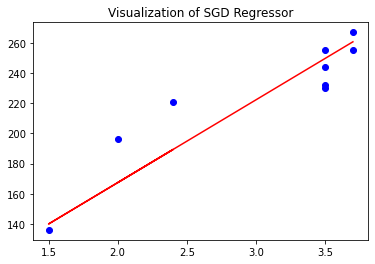

In [12]:
# 4. Plot final line (best fit line) along with other data points
plt.scatter(X, Y,color ='blue')
plt.plot(X, Y_prediction,color ='red')
plt.title('Visualization of SGD Regressor')
plt.show()